In [15]:
from sympy import *
import sympy as sp
init_printing(use_unicode=True)

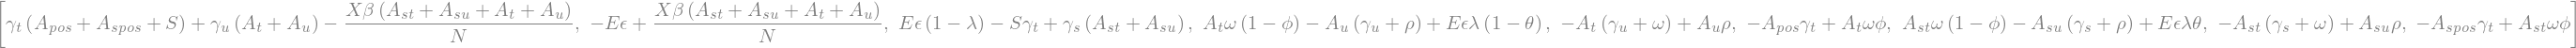

In [16]:
# Define the symbols
X, E, S, A_u, A_t, A_pos, A_s_u, A_s_t, A_s_pos = sp.symbols('X E S A_u A_t A_pos A_s_u A_s_t A_s_pos')

# Enforce that all of our parameters are positive
beta, epsilon, lambda_, gamma_t, gamma_s, gamma_u, theta, phi, rho, omega, N = sp.symbols('beta epsilon lambda gamma_t gamma_s gamma_u theta phi rho omega N', positive=True)

# Define the equations
dX_dt = -beta/N * (A_u + A_t + A_s_u + A_s_t) * X + gamma_t * (S + A_pos + A_s_pos) + gamma_u * (A_u + A_t)
dE_dt = beta/N * (A_u + A_t + A_s_u + A_s_t) * X - epsilon * E
dS_dt = -(gamma_t * S - ((1 - lambda_) * epsilon * E + gamma_s * (A_s_u + A_s_t)))
dA_u_dt = -((rho + gamma_u) * A_u - ((1 - theta) * lambda_ * epsilon * E + (1 - phi) * omega * A_t))
dA_t_dt = -((omega + gamma_u) * A_t - rho * A_u)
dA_pos_dt = -(gamma_t * A_pos - phi * omega * A_t)
dA_s_u_dt = -((rho + gamma_s) * A_s_u - (theta * lambda_ * epsilon * E + (1 - phi) * omega * A_s_t))
dA_s_t_dt = -((omega + gamma_s) * A_s_t - rho * A_s_u)
dA_s_pos_dt = -(gamma_t * A_s_pos - phi * omega * A_s_t)

# Creating a list of equations
equations = [dX_dt, dE_dt, dS_dt, dA_u_dt, dA_t_dt, dA_pos_dt, dA_s_u_dt, dA_s_t_dt, dA_s_pos_dt]
equations

In [17]:
#Define the New Infections equations: 

F1 = beta/N * (A_u + A_t + A_s_u + A_s_t) * X
F2 = 0
F3 = 0
F4 = 0
F5 = 0
F6 = 0
F7 = 0
F8 = 0

new_infections = sp.Matrix([F1,F2,F3,F4,F5,F6,F7,F8])

In [18]:
#Define the Flow Transition equations:

V1 = epsilon * E
V2 = gamma_t * S - ((1 - lambda_) * epsilon * E + gamma_s * (A_s_u + A_s_t))
V3 = (rho + gamma_u) * A_u - ((1 - theta) * lambda_ * epsilon * E + (1 - phi) * omega * A_t)
V4 = (omega + gamma_u) * A_t - rho * A_u
V5 = gamma_t * A_pos - phi * omega * A_t
V6 = (rho + gamma_s) * A_s_u - (theta * lambda_ * epsilon * E + (1 - phi) * omega * A_s_t)
V7 = (omega + gamma_s) * A_s_t - rho * A_s_u
V8 = gamma_t * A_s_pos - phi * omega * A_s_t

transition_equations = sp.Matrix([V1,V2,V3,V4,V5,V6,V7,V8])

In [19]:
#define the disease-free equilibrium 

dfe=sp.Matrix([N,0,0,0,0,0,0,0,0])
print('DFE=', dfe)

DFE= Matrix([[N], [0], [0], [0], [0], [0], [0], [0], [0]])


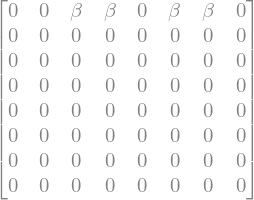

In [20]:
# The Matrix F is the Jacobian of the new_infections equations evaluated at the DFE:


new_infections_jacobian = new_infections.jacobian([E, S, A_u, A_t, A_pos, A_s_u, A_s_t, A_s_pos])
F=new_infections_jacobian.subs({X:dfe[0],E:dfe[1], S:dfe[2], A_u:dfe[3], A_t:dfe[4], A_pos:dfe[5], A_s_u:dfe[6], A_s_t:dfe[7], A_s_pos:dfe[8]})
F

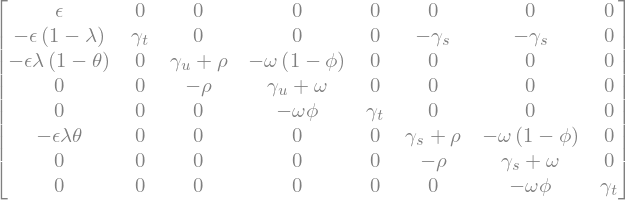

In [21]:
# The transition matrix V is the Jacobian of the transition_equations evaluated at the DFE:

transition_equations_jacobian = transition_equations.jacobian([E, S, A_u, A_t, A_pos, A_s_u, A_s_t, A_s_pos])
V=transition_equations_jacobian.subs({X:dfe[0],E:dfe[1], S:dfe[2], A_u:dfe[3], A_t:dfe[4], A_pos:dfe[5], A_s_u:dfe[6], A_s_t:dfe[7], A_s_pos:dfe[8]})
V

In [22]:
#LaTeX code
print(latex(V))

\left[\begin{matrix}\epsilon & 0 & 0 & 0 & 0 & 0 & 0 & 0\\- \epsilon \left(1 - \lambda\right) & \gamma_{t} & 0 & 0 & 0 & - \gamma_{s} & - \gamma_{s} & 0\\- \epsilon \lambda \left(1 - \theta\right) & 0 & \gamma_{u} + \rho & - \omega \left(1 - \phi\right) & 0 & 0 & 0 & 0\\0 & 0 & - \rho & \gamma_{u} + \omega & 0 & 0 & 0 & 0\\0 & 0 & 0 & - \omega \phi & \gamma_{t} & 0 & 0 & 0\\- \epsilon \lambda \theta & 0 & 0 & 0 & 0 & \gamma_{s} + \rho & - \omega \left(1 - \phi\right) & 0\\0 & 0 & 0 & 0 & 0 & - \rho & \gamma_{s} + \omega & 0\\0 & 0 & 0 & 0 & 0 & 0 & - \omega \phi & \gamma_{t}\end{matrix}\right]


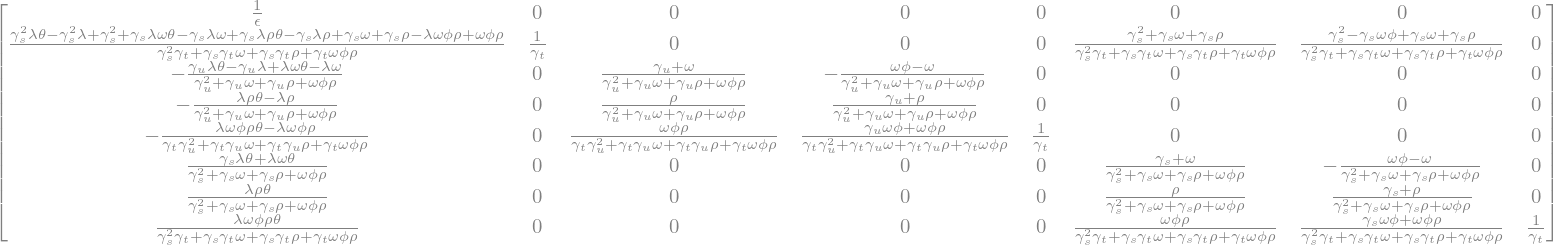

In [23]:
# Find the Inverse of V
V.inv()

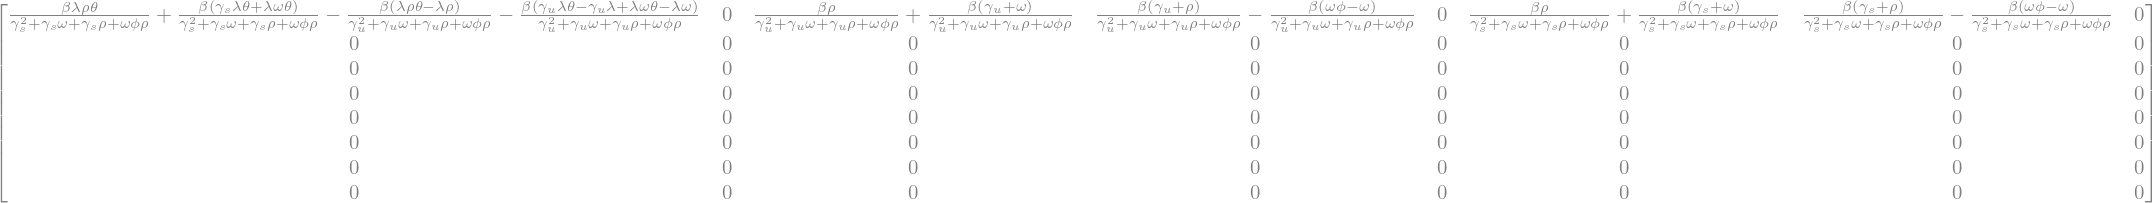

In [24]:
#The next generation matrix is then the product of F with the inverse of V: 

K=F*(V.inv())
K

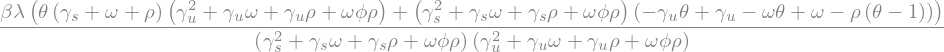

In [25]:
# The R0 value for our model (by the next generation method) is the spectral radius of the next-generation
# matrix K. K is upper triangular, so the only non-zero eigenvalue is the upper-left entry:

eigenvalues=K.eigenvals()
r0 = None
for eigenvalue, multiplicity in eigenvalues.items():
    if simplify(eigenvalue) != 0: 
        r0 = eigenvalue
        break  
        
r0=r0.simplify()
r0

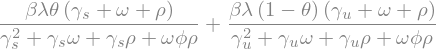

In [31]:
# We couldn't get SymPy to simplify this into two terms, but you can see from the above expression 
# that it simplifies as

exp1=beta * lambda_ * theta * (gamma_s + omega + rho) / (gamma_s**2 + gamma_s * omega + gamma_s * rho + omega * phi * rho) 
exp2=beta * lambda_ *(1 - theta) * (gamma_u + omega + rho) / (gamma_u**2 + gamma_u * omega + gamma_u * rho + omega * phi * rho)


r0_simp=exp1 + exp2
r0_simp


In [36]:
#check that we didn't make any algebra mistakes!

(r0-r0_simp).simplify()

# yay!

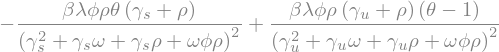

In [38]:
# Having the expression in this form makes it much easier to differentiate

exp1=beta * lambda_ * theta * (gamma_s + omega + rho) / (gamma_s**2 + gamma_s * omega + gamma_s * rho + omega * phi * rho) 
exp2=beta * lambda_ *(1 - theta) * (gamma_u + omega + rho) / (gamma_u**2 + gamma_u * omega + gamma_u * rho + omega * phi * rho)

diffexp1=exp1.diff(omega).factor()
diffexp2=exp2.diff(omega).factor()

r0_diff_omega=diffexp1+diffexp2
r0_diff_omega


In [46]:
# Since our parameters were defined to be positive, it is straight forward to check that by 
#defining a new symbol for 1-theta and forcing it to be positive (which is true since theta is a probability).


one_minus_theta = sp.symbols('(1-theta)', positive=True)


exp1=beta * lambda_ * theta * (gamma_s + omega + rho) / (gamma_s**2 + gamma_s * omega + gamma_s * rho + omega * phi * rho) 
exp2_new_symb=beta * lambda_ *(one_minus_theta) * (gamma_u + omega + rho) / (gamma_u**2 + gamma_u * omega + gamma_u * rho + omega * phi * rho)

diffexp1=exp1.diff(omega).factor()
diffexp2_new_symb=exp2_new_symb.diff(omega).factor()

r0_diff_omega=diffexp1+diffexp2_new_symb
r0_diff_omega<0



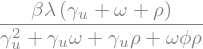

In [28]:
#We structured the model with two asymptomatic branches because we expect gamma_s and gamma_u to be very different.
#However, this is debated and if we assume they are similar and substitute gamma_u=gamma_s and theta=1/2, we get: 

r0_special_case=r0.subs([(gamma_s, gamma_u), (theta,1/2)])
r0_special_case.simplify()

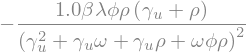

In [31]:
# In this simplified version, observe that the derivative with respect to omega is negative, 
# suggesting that R0 is decreasing with respect to omega.
r0_special_case.diff(omega).factor().simplify()

In [5]:
import numpy as np
from scipy import stats
import pandas as pd
import time

def estBetaParams(mu, var):
        alpha=((1 - mu) / var - 1 / mu) * mu**2
        beta=alpha * (1 / mu - 1)
        return alpha,beta

def estGammaParams(mu,var):
    shape=(mu**2)/var
    scale=var/mu
    return shape, scale

# Function to calculate R0
def calculate_R0(beta, lambda_, theta, gamma_s, gamma_u, omega, rho, phi):
    numerator = (beta * lambda_ * (theta * (gamma_s + omega + rho) * (gamma_u**2 + gamma_u * omega + gamma_u * rho + omega * phi * rho)
                  - (gamma_s**2 + gamma_s * omega + gamma_s * rho + omega * phi * rho) * (gamma_u * theta - gamma_u 
                  + omega * theta - omega + rho * (theta - 1))))
    
    denominator = ((gamma_s**2 + gamma_s * omega + gamma_s * rho + omega * phi * rho) 
                   * (gamma_u**2 + gamma_u * omega + gamma_u * rho + omega * phi * rho))
    
    return numerator / denominator
    
samples = 100000000
r0vtau=[]
# Calculate distribution parameters once before the loop
# Calculate distribution parameters once before the loop
beta_params = estBetaParams(0.7, 0.1**2)
ppd_params = estGammaParams(1.142,10**2)
epsilon_params = estGammaParams(5,1)
gamma_t_params = estGammaParams(7,1)
gamma_u_params = estGammaParams(180,25**2)
gamma_s_params = estGammaParams(14,1)
theta_params = estBetaParams(0.25,0.1**2)
lambda_params = estBetaParams(0.5,0.25**2)

sensitivity_params = estBetaParams(0.6,0.2**2)


p_3months = 0.3          # Proportion tested every 3 months
p_12months = 1-p_3months         # Proportion tested every 12 months


# The (weighted) average testing time between tests per person
average_test_waiting_time = 1/(p_3months/91 + p_12months/365)

rho_params = estGammaParams(average_test_waiting_time, 7**2)


for tau in range(1,15):
    omega_params = estGammaParams(tau,1)
    
    start=time.time()
    r0_estimates=[]
    for i in range(samples):


        
            # Sample from the distributions for each parameter
        # Sample from the distributions using the pre-calculated parameters
        beta_val = np.random.beta(*beta_params) * (np.random.gamma(*ppd_params) / 30)
        lambda_val = np.random.beta(*lambda_params)
        gamma_u_val = 1 / (np.random.gamma(*gamma_u_params) + 1e-10)
        omega_val = 1 / (np.random.gamma(*omega_params) + 1e-11)
        sensitivity_val = np.random.beta(*sensitivity_params)
        theta_val = np.random.beta(*theta_params)
        gamma_s_val = 1 / (np.random.gamma(*gamma_s_params))
        rho_val = 1 / (np.random.gamma(*rho_params) + 1e-10)


        R0 = calculate_R0(beta_val, lambda_val, theta_val, gamma_s_val, gamma_u_val, omega_val, rho_val, sensitivity_val)
        r0_estimates.append(R0)  # Append to r0_estimates, not R0_values

    
        
    mean_r0 = np.mean(r0_estimates)
    conf_interval = stats.norm.interval(0.95, loc=mean_r0, scale=np.std(r0_estimates)/np.sqrt(float(samples)))
    r0vtau.append([tau, mean_r0, conf_interval[0], conf_interval[1]])
    print(tau, time.time()-start)
    
# Create a DataFrame
df = pd.DataFrame(r0vtau, columns=['Tau', 'R0 Estimate', 'Lower Confidence Bound', 'Upper Confidence Bound'])

# If you want to record the number of samples, you can add it as an additional column
df['Samples'] = samples

file_path = f'/Users/gregorycousins/Gonnorhea_proj/results/data/r0_estimates/r0_estimates_samples_{samples}.csv'

# Save the DataFrame to the specified CSV file
df.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

1 1108.487334728241
2 1044.9555950164795
3 1052.248360157013
4 1043.1226019859314
5 1046.3831732273102
6 1045.3228468894958
7 1050.7388322353363
8 1039.1550688743591
9 1039.9971277713776
10 2149.833503007889
11 1134.0616400241852
12 1285.8836290836334
13 1232.2492008209229
14 1143.5869488716125
File saved to /Users/gregorycousins/Gonnorhea_proj/results/data/r0_estimates/r0_estimates_samples_100000000.csv


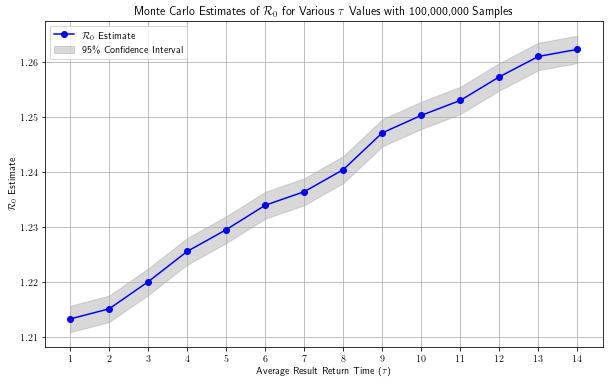

In [6]:
import matplotlib.pyplot as plt


import os
import pandas as pd
import numpy as np


directory = '/Users/gregorycousins/Gonnorhea_proj/results/data/r0_estimates'


files = os.listdir(directory)

# Filter out files that are not CSV
csv_files = [file for file in files if file.endswith('.csv')]

# Sort the files by their creation time (newest first)
csv_files.sort(key=lambda x: os.path.getctime(os.path.join(directory, x)), reverse=True)

# Select the most recent file
latest_file = csv_files[0]

# Create the full path to the latest file
latest_file_path = os.path.join(directory, latest_file)

# Read the latest CSV file into a DataFrame
df = pd.read_csv(latest_file_path)



# Ensure that LaTeX is enabled in Matplotlib
plt.rc('text', usetex=True)

# Plot R0 Estimate against Tau
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df['Tau'], df['R0 Estimate'], label='$\mathcal{R}_0$ Estimate', color='blue', marker='o')

# Fill the area between the lower and upper confidence bounds
plt.fill_between(df['Tau'], df['Lower Confidence Bound'], df['Upper Confidence Bound'], color='gray', alpha=0.3, label=r'95\% Confidence Interval')

# Add legend
plt.legend()

# Add title and axis labels with LaTeX
plt.title(r'Monte Carlo Estimates of $\mathcal{R}_0$ for Various $\tau$ Values with 100,000,000 Samples')
plt.xlabel(r'Average Result Return Time ($\tau$)')
plt.ylabel(r'$\mathcal{R}_0$ Estimate')

# Optionally, you can add a grid for better readability
plt.grid(True)

# Set x-axis ticks to show each integer value of Tau
plt.xticks(df['Tau'])




file_path_r0 = f'/Users/gregorycousins/Gonnorhea_proj/results/plots/R0_Monte_Carlo.png'

plt.savefig(file_path_r0)

# Show the plot
plt.show()

